<a href="https://colab.research.google.com/github/MatthewBenning/Statistics-Honours-Research-Project/blob/main/cointegration002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Matthew Benning
# Statistics Honours
# Research Project 
# In this file, we set up a framework for finding cointegrated pairs in our data


# Cointegration test done using the Augmented DickyFuller method 
############################################

# Import the sample paths simulation from the other script file

import numpy as np 
import pandas as pd 
from pandas import read_csv
from pandas_datareader import wb
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt


def coint_pairs(data): 
  
  n=data.shape[1]
  score_matrix = np.zeros((n,n))
  pvalue_matrix = np.ones((n,n))
  pairs =[]
  keys = data.keys()

  # Loop through all assets, checking the cointegrability with all the others
  for i in range(n):
    for j in range (i+1,n):
      asset_1 = data[keys[i]]
      asset_2 = data[keys[j]]
      result = coint(asset_1,asset_2)
      score = result[0]
      pvalue = result[1]
      score_matrix[i,j]= score
      pvalue_matrix[i,j]= pvalue
      
      # Set a target threshold for the pairs we accept
      # Obviosuly this is does not imply cointegrated but just a good guide 
      if pvalue < 0.025:
        pairs.append((keys[i],keys[j]))

  return pairs, score_matrix, pvalue_matrix 

# Run on the data generated in the sample_paths script file
df = read_csv('generated_prices.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Run the cointegration test
results1 = coint_pairs(df)
print(results1[0])



[('0.5', '0.6'), ('0.5', '0.59'), ('0.5', '0.70'), ('0.6', '0.10'), ('0.6', '0.20'), ('0.6', '0.27'), ('0.6', '0.40'), ('0.6', '0.49'), ('0.6', '0.53'), ('0.6', '0.63'), ('0.6', '0.66'), ('0.6', '0.70'), ('0.6', '0.72'), ('0.7', '0.21'), ('0.7', '0.27'), ('0.7', '0.39'), ('0.7', '0.49'), ('0.7', '0.53'), ('0.7', '0.56'), ('0.7', '0.70'), ('0.7', '0.85'), ('0.7', '0.92'), ('0.8', '0.65'), ('0.9', '0.12'), ('0.9', '0.27'), ('0.9', '0.56'), ('0.9', '0.63'), ('0.9', '0.73'), ('0.9', '0.92'), ('0.10', '0.12'), ('0.10', '0.43'), ('0.10', '0.46'), ('0.10', '0.47'), ('0.10', '0.74'), ('0.10', '0.75'), ('0.10', '0.80'), ('0.11', '0.26'), ('0.11', '0.33'), ('0.11', '0.43'), ('0.11', '0.45'), ('0.11', '0.46'), ('0.11', '0.48'), ('0.11', '0.57'), ('0.11', '0.61'), ('0.11', '0.74'), ('0.11', '0.88'), ('0.11', '0.97'), ('0.13', '0.34'), ('0.16', '0.81'), ('0.16', '0.99'), ('0.19', '0.81'), ('0.20', '0.27'), ('0.20', '0.53'), ('0.21', '0.56'), ('0.21', '0.85'), ('0.22', '0.23'), ('0.22', '0.24'), ('0

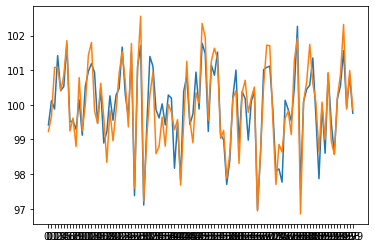

0       1.001936
0.1     1.004455
0.2     0.988135
0.3     1.003265
0.4     0.999982
          ...   
0.95    0.996794
0.96    0.992637
0.97    1.000502
0.98    0.998572
0.99    0.998950
Length: 100, dtype: float64


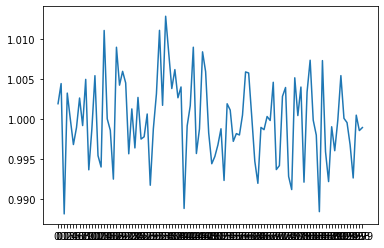

In [ ]:
# Doing this we find that asset price path 5 and 6 are cointegrated 
# Plot them to see what they look like 

plt.plot(df.iloc[5])
plt.plot(df.iloc[6])
plt.show()

a1 = df.iloc[5]
a2 = df.iloc[6]

# Ratio of the prices = hedge 
hedge = a1/a2
print(hedge)
plt.plot(hedge)


# New section